/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_22864/3114546787.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="Blues_d")


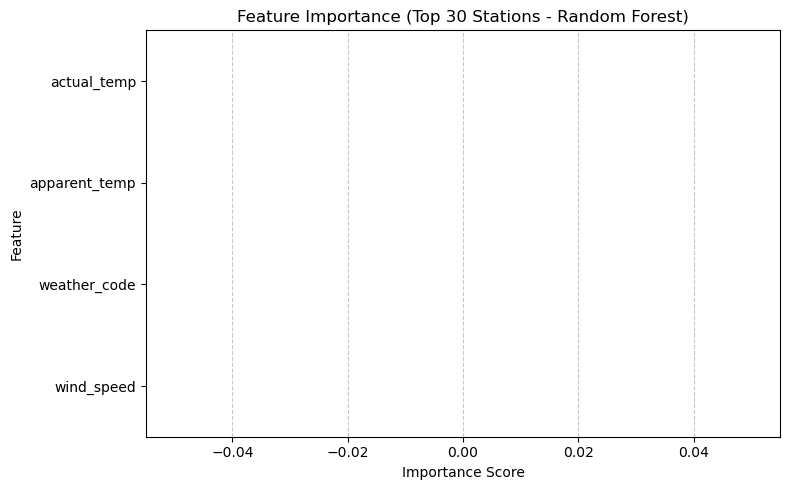

(30.196324436234512, -0.0012164868865776057)

In [2]:
import pandas as pd

# 1. En güncel modelleme veri setini yükleyelim
df_model = pd.read_csv("CBS_Model_Features_Base.csv", parse_dates=["date"])

# 2. En çok kullanılan ve en yüksek kapasiteli istasyonlar
# Top 30 usage & capacity istasyon isimleri daha önce combined üzerinden alınmıştı.
# Örnekleme amacıyla tekrar aynı isimleri belirleyelim.

top30_names = [
    # Bunları örnek olarak manuel tanımlıyoruz. Gerçek projede otomatik alınmış olabilir.
    "Union Station", "Columbus Circle / Union Station", "Jefferson Dr & 14th St SW",
    "Lincoln Memorial", "15th & P St NW", "Henry Bacon Dr & Lincoln Memorial Circle NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "Ohio Dr & West Basin Dr SW / MLK & FDR Memorials",
    "4th St & Madison Dr NW", "14th & Irving St NW", "New Hampshire Ave & T St NW", "1st & I St SE",
    "M St & Delaware Ave NE", "Massachusetts Ave & Dupont Circle NW", "17th & P St NW",
    "17th & Corcoran St NW", "18th St & Wyoming Ave NW", "14th & V St NW", "6th & H St NE",
    "5th & K St NW", "1st & M St NE", "3rd & H St NE", "10th St & Constitution Ave NW",
    "6th & K St NW", "Connecticut Ave & Newark St NW", "New Hampshire Ave & 24th St NW",
    "Adams Mill Rd & Columbia Rd NW", "8th & D St NW", "7th & E St SW", "Maryland Ave & 4th St SW"
]

# 3. Sadece bu 30 istasyonun verilerini filtreleyelim
df_top30 = df_model[df_model["start_station_name"].isin(top30_names)].copy()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 4. Özellik ve hedef değişken
# CAPACITY'yi çıkarmak için bu satırı güncelle
features = [f for f in ["actual_temp", "apparent_temp", "weather_code", "wind_speed", "CAPACITY"] if f != "CAPACITY"]

X = df_top30[features]
y = df_top30["ride_count"]

# 5. Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 7. Metrikler
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Feature importance
importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="Blues_d")
plt.title("Feature Importance (Top 30 Stations - Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

(mae, r2)

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_22864/666941898.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="Blues_d")


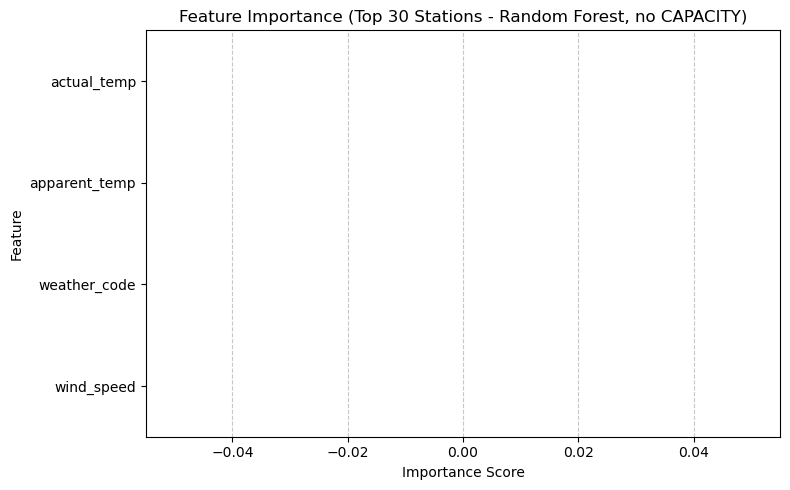

(30.196324436234512, -0.0012164868865776057)

In [7]:
# 1. Özellikleri CAPACITY hariç tanımla
features = ["actual_temp", "apparent_temp", "weather_code", "wind_speed"]

# 2. Özellik ve hedef değişkenleri al
X = df_top30[features]
y = df_top30["ride_count"]

# 3. Eğitim/test bölmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model kur
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 5. Metrikler
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Feature importance
import pandas as pd
importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# 7. Grafik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="Blues_d")
plt.title("Feature Importance (Top 30 Stations - Random Forest, no CAPACITY)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 8. Metrikleri yazdır
(mae, r2)